In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation_functions import *
from tqdm import tqdm

In [2]:
def dndt(k,K,n,lam):
    return np.matmul(k*(np.outer(np.ones(len(n)),n)+ K)**(-1),n) - lam*n

In [3]:
def J(k,K,n,lam):
    return k*K/(K**2 + 2*K*(np.outer(np.ones(len(n)),n)) + (np.outer(np.ones(len(n)),n))**2) - lam*np.identity(len(n))

In [4]:
def run_simulation(k,K,lam,n):
    
    g = k.shape[0]
    dt = 0.01
    thresh = 0.0007
    steps = 500000
    nt = np.zeros((g,steps))
    for i in range(steps):
        n = n + dndt(k,K,n,lam)*dt
        nt[:,i] = n
        if i > 0 and np.sum(np.abs(n - nt[:,i-1]))/np.sum(np.abs(n)) < thresh:
            nt = nt[:,:i+1]
            break
            
    Jc = J(k,K,nt[:,i],lam)
    w, v = np.linalg.eig(Jc)
    w = np.real(w)
    dlambda = np.sort(w)[-2]/np.sort(w)[-1]
    IPR = np.sum((v[np.argsort(w)][-1] * np.conjugate(v[np.argsort(w)][-1]))**2)
    return dlambda, IPR, nt

In [312]:
np.max(np.abs((n_perturbed[:,130] - n_perturbed[:,131])/n_perturbed[:,130]))

0.0017668328891141311

In [6]:
g = 30
lam = 5
is_connected = np.random.rand(g,g) < .25
is_connected = np.tril(is_connected, k=-1)
is_connected = is_connected + np.transpose(is_connected)
k = np.multiply(is_connected,np.random.rand(g,g))
K = np.multiply(is_connected,np.random.rand(g,g))
n = np.zeros(g) + 0.5

In [7]:
dlambda, IPR, nt = run_simulation(k,K,lam,n=n)
lambdas = [dlambda]

In [21]:
dlambda, IPR, nt = run_simulation(k,K,lam,n=nt[:,-1])
lambdas = [dlambda]

In [22]:
n0 = nt[:,-1]

In [28]:
Jc = J(k,K,n0,lam)
w, v = np.linalg.eig(Jc)
w = np.real(w)

In [37]:
np.dot(v[0,:],v[2,:])

(-0.079289463320765-1.3823577699190182e-18j)

In [30]:
np.sort(w)[-1]

-0.06995976729078346

In [24]:
(k[1,0]*k[0,1] - K[1,0]*K[0,1]*lam**2)/(K[1,0]*lam + k[0,1])

-1.805618116332282

In [27]:
n = np.zeros(g) + 0.5
dlambda, IPR, nt = run_simulation(k,K,lam,n)
lambdas = [dlambda]
for kk in tqdm(range(20000)):
    l = np.random.randint(len(np.nonzero(is_connected)[0]))
    i, j = np.nonzero(is_connected)[0][l],np.nonzero(is_connected)[1][l]
    k_new = np.array(k)
    K_new = np.array(K)
    K_new[i,j] = K_new[i,j] + (np.random.rand() - 0.5)*2/5
    k_new[i,j] = k_new[i,j] + (np.random.rand() - 0.5)*2/5
    if k_new[i,j] < 1 and K_new[i,j] < 1 and K_new[i,j] > 0 and k_new[i,j]> 0:
        n = np.zeros(g) + 0.5
        dlambda_new, IPR_new, nt = run_simulation(k_new,K_new,lam,n)
        lambdas.append(dlambda_new)
        if (IPR_new < IPR or IPR_new < 2/g) and (dlambda_new > dlambda):
            k = k_new
            K = K_new
            dlambda = dlambda_new
            IPR = IPR_new
print(dlambda)
print(IPR)

  0%|                                              | 0/20000 [00:00<?, ?it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_78864/4250181239.py:2: RuntimeWarning: invalid value encountered in divide
  return k*K/(K**2 + 2*K*(np.outer(np.ones(len(n)),n)) + (np.outer(np.ones(len(n)),n))**2) - lam*np.identity(len(n))
  0%|                                   | 3/20000 [00:16<30:02:21,  5.41s/it]


LinAlgError: Array must not contain infs or NaNs

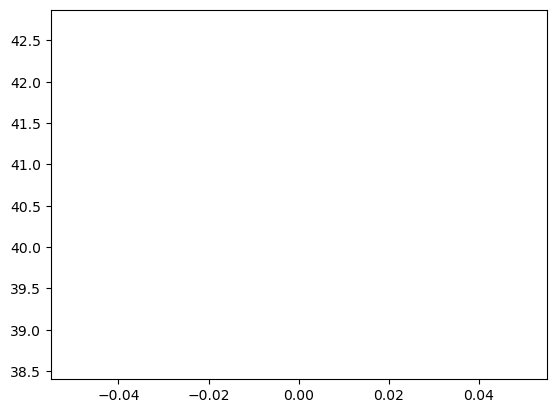

In [26]:
plt.plot(lambdas)

In [38]:
n0 = nt[:,-1]

In [41]:
dlambda, IPR, n_perturbed = run_simulation(k,K,lam, n = n0 +  .001*(np.random.random(len(n0)) - 0.5))

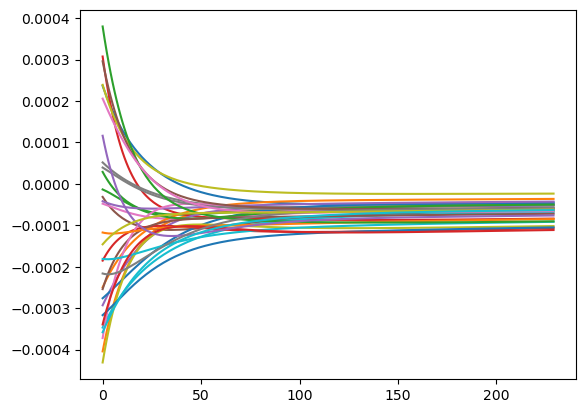

In [42]:
for i in range(g):
    plt.plot(n_perturbed[i,:])
#plt.xlim((0,7500))

In [300]:
Jc = J(k,K,n0,lam)
w, v = np.linalg.eig(Jc)
#w = np.real(w)

In [301]:
np.sort(w)[-1]

(-0.09523209491334761+0j)

In [45]:
v.shape

(30, 30)

In [261]:
np.argsort(w)

array([ 1,  2,  6,  8,  7, 13, 15, 14, 16, 22, 24, 23, 21, 20, 27, 29, 28,
       26, 25, 19, 18, 17, 12, 11, 10,  9,  5,  4,  3,  0])

In [49]:
v[:,np.argsort(w)][:,-1]

array([-0.07668675+0.j, -0.08266011+0.j, -0.17241199+0.j, -0.2441584 +0.j,
       -0.02907485+0.j, -0.13797476+0.j, -0.16845659+0.j, -0.27710535+0.j,
       -0.27635012+0.j, -0.10100829+0.j, -0.18274   +0.j, -0.05957832+0.j,
       -0.14363674+0.j, -0.15100077+0.j, -0.2331654 +0.j, -0.22873107+0.j,
       -0.20529199+0.j, -0.13365222+0.j, -0.18595826+0.j, -0.18375805+0.j,
       -0.14372548+0.j, -0.33348049+0.j, -0.08975868+0.j, -0.19897548+0.j,
       -0.20480495+0.j, -0.22449835+0.j, -0.10029362+0.j, -0.06333118+0.j,
       -0.2273009 +0.j, -0.18253302+0.j])

In [142]:
np.sort(w)[-1]

-0.067568560388644

In [143]:
np.sort(w)[-2]/np.sort(w)[-1]

38.82545675904681

In [57]:
w[np.argsort(w)][-2]/w[np.argsort(w)][-1]

38.82545675904681

In [58]:
np.sum((v[np.argsort(w)][-1] * np.conjugate(v[np.argsort(w)][-1]))**2)

(0.011918483983748899+0j)

In [33]:
mag_v_0 = np.sqrt(np.sum(v[np.argsort(w)][0] * np.conjugate(v[np.argsort(w)][0])))
mag_v_1 = np.sqrt(np.sum(v[np.argsort(w)][1] * np.conjugate(v[np.argsort(w)][1])))
mag_v_2 = np.sqrt(np.sum(v[np.argsort(w)][2] * np.conjugate(v[np.argsort(w)][2])))
mag_v_3 = np.sqrt(np.sum(v[np.argsort(w)][3] * np.conjugate(v[np.argsort(w)][3])))

In [296]:
mag_v_1

(1.1907211537368363+0j)

/Users/christopher/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


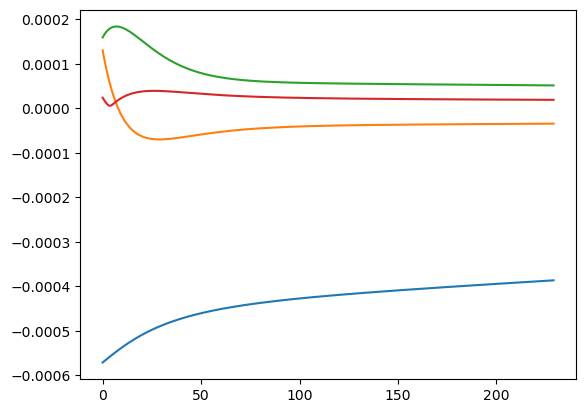

In [43]:
plt.plot((np.dot(v[:,0],n_perturbed)))
plt.plot(np.dot(v[:,1],n_perturbed))
plt.plot(np.dot(v[:,2],n_perturbed)+np.dot(v[:,3],n_perturbed))
plt.plot(np.abs(np.dot(v[np.argsort(w)][-30],n_perturbed)))
#plt.xlim((2000,5000))
#plt.yscale('log')
#plt.xscale('log')


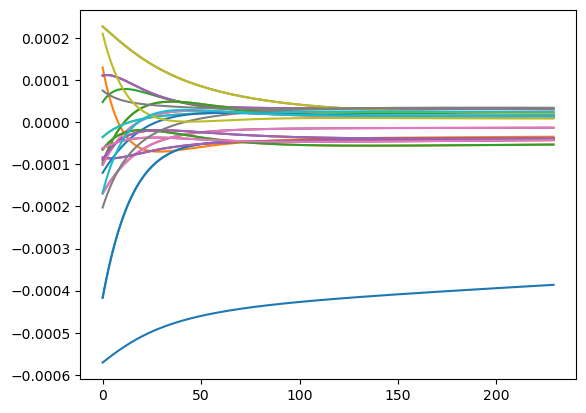

In [45]:
for i in range(g):
    plt.plot((np.dot(v[:,i],n_perturbed)))

In [208]:
w

array([-0.07234912+0.j        , -8.05611388+0.j        ,
       -7.55535131+0.94713091j, -7.55535131-0.94713091j,
       -2.48057563+0.j        , -3.25829538+0.96791999j,
       -3.25829538-0.96791999j, -3.07959865+0.44585228j,
       -3.07959865-0.44585228j, -3.05648432+0.j        ,
       -6.82241984+0.9148262j , -6.82241984-0.9148262j ,
       -7.1463084 +0.j        , -3.77987324+0.j        ,
       -3.87343087+0.38153377j, -3.87343087-0.38153377j,
       -5.47172229+1.20070557j, -5.47172229-1.20070557j,
       -6.70013496+0.j        , -6.320837  +0.47263602j,
       -6.320837  -0.47263602j, -5.70739469+0.43584462j,
       -5.70739469-0.43584462j, -5.80540564+0.j        ,
       -4.73975238+0.82932869j, -4.73975238-0.82932869j,
       -4.8435922 +0.75107306j, -4.8435922 -0.75107306j,
       -5.02776552+0.j        , -4.53020008+0.j        ])

In [69]:
np.matmul(np.linalg.inv(v),n_perturbed).shape

(30, 172)

In [65]:
np.transpose(n_perturbed).shape

(172, 30)

In [281]:
w[np.argsort(w)[-2]]

-2.6960376773781007

In [37]:
plt.plot(np.abs(np.matmul(np.linalg.inv(v),n_perturbed))[np.argsort(w)[-],:])
plt.plot(np.abs(np.matmul(np.linalg.inv(v),n_perturbed))[np.argmin(w),:])
plt.xlim((0,20))

#plt.yscale('log')
#plt.xscale('log')

SyntaxError: invalid syntax (3044693301.py, line 1)

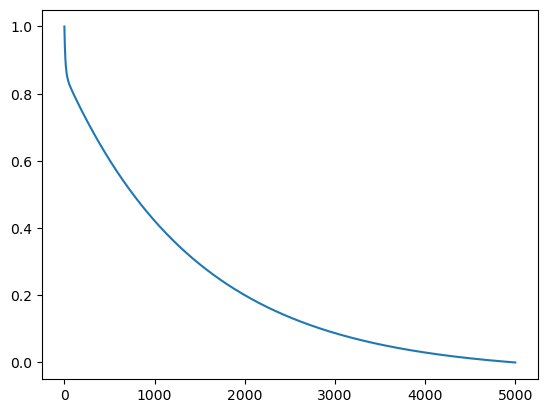

In [294]:
for i in range(0,1):
    vfast = np.abs(np.matmul(np.linalg.inv(v),nt))[i,:]
    plt.plot((vfast - vfast[-1])/(vfast[0]-vfast[-1]))
#plt.xlim((0,150))

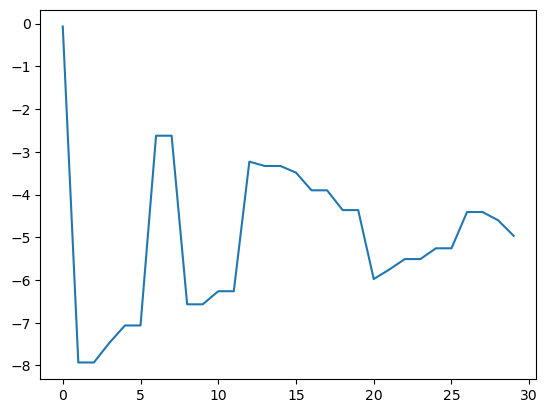

In [237]:
plt.plot(range(0,30),w)

In [254]:
sig = np.real(np.array(v[0]))
sig = sig/np.linalg.norm(sig)
p = np.real(np.array(v[0]))
p = p/np.linalg.norm(p)


In [287]:
def run_simulation_controller(k,K,n_start,n0,sig,p):
    n = n_start
    dn = -np.dot(sig,(n_start - n0))*p
    n = n + dn
    g = k.shape[0]
    dt = 0.01
    steps = 5000
    nt = np.zeros((g,steps),dtype=np.complex_)
    for i in range(steps):
        n = n + dndt(k,K,n,lam)*dt
        nt[:,i] = n
            
    return nt

In [281]:
def fixed_point_dist(nt,n0,t):   
    return np.sum((nt[:,t] - n0)**2)

In [286]:
fixed_point_dist(n_perturbed,n0,1000)

5.554217005310153e-06

In [442]:
g = k.shape[0]
n_pertubs = 10
#sig = np.random.rand(g)-0.5
sig = v[np.argsort(w)[-1]]
sig = sig/np.linalg.norm(sig)
p = v[np.argsort(w)[-1]]

#p = (np.random.rand(g)-0.5)*0.2

dists = np.zeros(n_pertubs)
for i in range(n_pertubs):
    dlambda, IPR, n_perturbed = run_simulation(k,K,lam, n = n0 +  .1*(np.random.random(len(n0)) - 0.5))
    n_start = np.array(n_perturbed[:,0]) 
    nt = run_simulation_controller(k,K,n_start,n0,sig,p)
    dists[i] = fixed_point_dist(n_perturbed,n0,1000) - fixed_point_dist(nt,n0,1000)
dist = np.mean(dists)
fixed_point_dists = [dist]

/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_96902/870079083.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  dists[i] = fixed_point_dist(n_perturbed,n0,1000) - fixed_point_dist(nt,n0,1000)


In [411]:
T = .2
np.exp((dist_new-dist)/T/dist)

0.047881726339860854

In [406]:
dist_new < dist

True

In [420]:
T = 0.1

for kk in tqdm(range(2000)):
    i, j = np.random.randint(g), np.random.randint(g)
    sig_new = np.array(sig)
    sig_new[i] = sig_new[i] + (np.random.rand() - 0.5)*4/5
    sig_new = sig_new/np.linalg.norm(sig_new)
    p_new = np.array(p)
    p_new[j] = p_new[j] + (np.random.rand() - 0.5)*4/5
    dists = np.zeros(n_pertubs)
    for i in range(n_pertubs):
        dlambda, IPR, n_perturbed = run_simulation(k,K,lam, n = n0 +  .01*(np.random.random(len(n0)) - 0.5))
        n_start = np.array(n_perturbed[:,0]) 
        nt = run_simulation_controller(k,K,n_start,n0,sig,p)
        dists[i] = fixed_point_dist(n_perturbed,n0,1000) - fixed_point_dist(nt,n0,1000)
    dist_new = np.mean(dists)
    if dist_new > dist:
        dist = dist_new
        p = p_new
        sig = sig_new
    elif np.exp((dist_new-dist)/T/dist) < np.random.rand():
        dist = dist_new
        p = p_new
        sig = sig_new
    max_dist.append(dist)
    fixed_point_dists.append(dist_new)


  0%|                                                         | 0/2000 [00:00<?, ?it/s]/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_96902/1627544617.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  dists[i] = fixed_point_dist(n_perturbed,n0,1000) - fixed_point_dist(nt,n0,1000)
  0%|▏                                              | 6/2000 [00:16<1:31:42,  2.76s/it]


KeyboardInterrupt: 

In [323]:
fixed_point_dist(n_perturbed,n0,1000)

5.554217005310153e-06

In [398]:
dists_test = []
for i in tqdm(range(1000)):
    dlambda, IPR, n_perturbed = run_simulation(k,K,lam, n = n0 +  .01*(np.random.random(len(n0)) - 0.5))
    n_start = np.array(n_perturbed[:,0]) 
    nt = run_simulation_controller(k,K,n_start,n0,sig,p)
    dists_test.append(fixed_point_dist(n_perturbed,n0,1000) - fixed_point_dist(nt,n0,1000))

100%|██████████████████████████████████████████████| 1000/1000 [03:37<00:00,  4.59it/s]


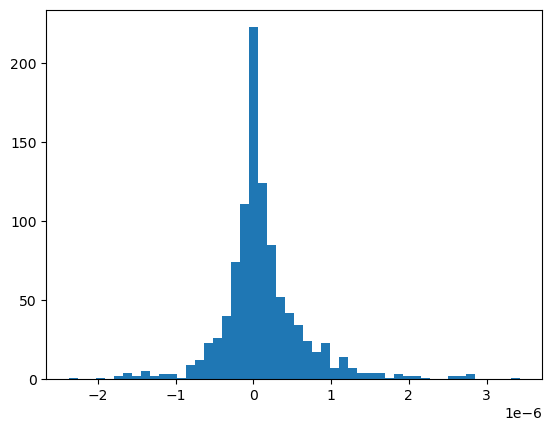

In [401]:
plt.hist(dists_test,bins = 50)
plt.show()

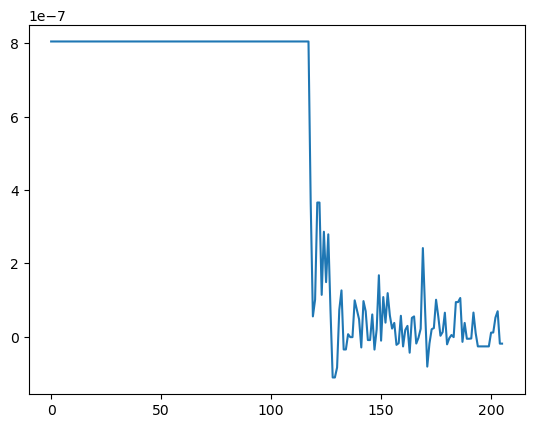

In [421]:
plt.plot(max_dist)

In [422]:
fixed_point_dists[-1]

-5.167108689700142e-08

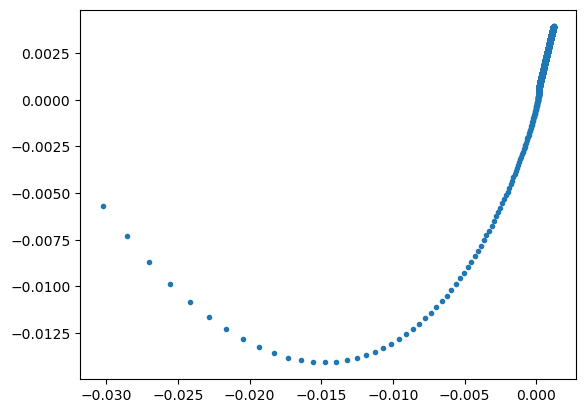

In [443]:
plt.scatter(n_perturbed[1,:],n_perturbed[25,:],marker='.')

In [67]:
plt.plot([fixed_point_dist(nt,n0,t) for t in range(30,4000)])
plt.plot([fixed_point_dist(n_perturbed,n0,t) for t in range(30,4000)])

NameError: name 'fixed_point_dist' is not defined

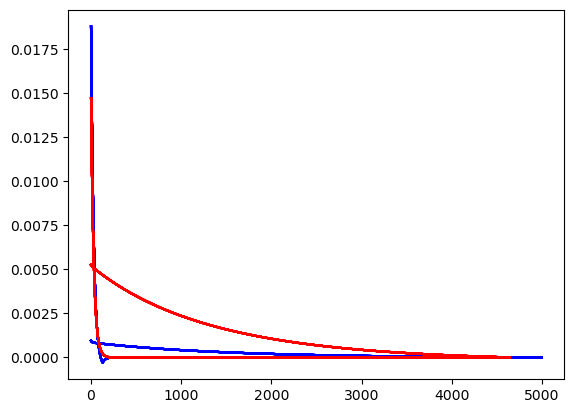

In [332]:
for i in range(len(w)):
    vslow = np.abs(np.matmul(np.linalg.inv(v),nt))[np.argsort(w)[-1],:]

    plt.plot((vslow-vslow[-1]),color = 'blue')
    vslow = np.abs(np.matmul(np.linalg.inv(v),nt))[np.argsort(w)[-4],:]

    plt.plot((vslow-vslow[-1]),color = 'blue')
for i in range(len(w)):
    vslow = np.abs(np.matmul(np.linalg.inv(v),n_perturbed))[np.argsort(w)[-1],:]

    plt.plot((vslow-vslow[-1]),color = 'red')
    vslow = np.abs(np.matmul(np.linalg.inv(v),n_perturbed))[np.argsort(w)[-4],:]

    plt.plot((vslow-vslow[-1]),color = 'red')

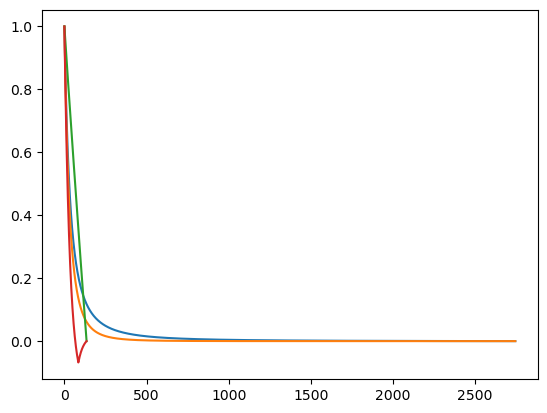

In [303]:
vslow = np.abs(np.matmul(np.linalg.inv(v),nt))[np.argsort(w)[-1],:]

plt.plot((vslow-vslow[-1])/(vslow[0]-vslow[-1]))

vfast = np.abs(np.matmul(np.linalg.inv(v),nt))[np.argsort(w)[-3],:]

plt.plot((vfast-vfast[-1])/(vfast[0]-vfast[-1]))

vslow = np.abs(np.matmul(np.linalg.inv(v),n_perturbed))[np.argsort(w)[-1],:]

plt.plot((vslow-vslow[-1])/(vslow[0]-vslow[-1]))

vfast = np.abs(np.matmul(np.linalg.inv(v),n_perturbed))[np.argsort(w)[-3],:]

plt.plot((vfast-vfast[-1])/(vfast[0]-vfast[-1]))

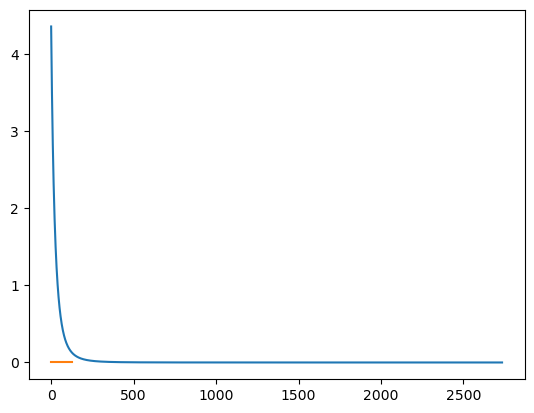

In [304]:
plt.plot(np.sum((np.transpose((nt)) - n0)**2,axis = 1)[10:])
plt.plot(np.sum((np.transpose((n_perturbed)) - n0)**2,axis = 1)[10:])


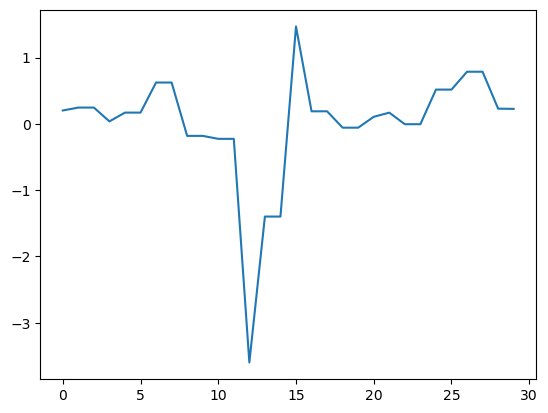

In [311]:
plt.plot(np.matmul(np.linalg.inv(v),sig))

In [321]:
np.matmul(np.linalg.inv(v),sig)

array([ 0.20190278+4.44354783e-16j,  0.24587226+2.60292409e-01j,
        0.24587226-2.60292409e-01j,  0.03721387+3.70321208e-16j,
        0.16983513+1.39934303e-01j,  0.16983513-1.39934303e-01j,
        0.62353144-3.42510910e-01j,  0.62353144+3.42510910e-01j,
       -0.18130742+3.66850837e-01j, -0.18130742-3.66850837e-01j,
       -0.2260034 -2.58812838e-01j, -0.2260034 +2.58812838e-01j,
       -3.5999978 -1.04934723e-15j, -1.39845666+3.26314975e-01j,
       -1.39845666-3.26314975e-01j,  1.46925293+7.71275669e-16j,
        0.18948025-4.55900418e-02j,  0.18948025+4.55900418e-02j,
       -0.05754411+7.71341406e-02j, -0.05754411-7.71341406e-02j,
        0.10653504+1.23526061e-16j,  0.16930205+5.17423788e-16j,
       -0.00512795+1.69760439e-01j, -0.00512795-1.69760439e-01j,
        0.51689789-4.47259947e-01j,  0.51689789+4.47259947e-01j,
        0.78662964+3.47859651e-01j,  0.78662964-3.47859651e-01j,
        0.22947345+1.52598232e-15j,  0.22626124-5.43019219e-16j])

In [320]:
np.dot(v[0],sig)

(0.05567438887147102+0.07819068335003944j)

In [446]:
v.shape

(30, 30)

In [451]:
v[:,3]

array([ 6.99048592e-05+0.j,  1.63897730e-02+0.j, -6.01237387e-02+0.j,
        1.02632109e-01+0.j, -4.47009538e-01+0.j,  2.09119061e-01+0.j,
       -1.72786657e-01+0.j, -7.78580087e-02+0.j, -9.03842840e-02+0.j,
        1.14410459e-01+0.j,  4.69279737e-01+0.j,  7.22093082e-02+0.j,
       -1.28878085e-01+0.j, -4.17519863e-02+0.j, -1.71933225e-01+0.j,
        1.02743761e-01+0.j, -1.34376266e-01+0.j, -1.31060156e-01+0.j,
       -3.01490317e-01+0.j,  8.80689156e-02+0.j,  6.96493872e-02+0.j,
        3.77187243e-02+0.j, -2.66194598e-01+0.j,  9.29656639e-02+0.j,
        8.12828858e-02+0.j, -1.12168662e-01+0.j,  1.05681029e-02+0.j,
        6.46260405e-02+0.j,  1.93491313e-01+0.j,  3.46947974e-01+0.j])

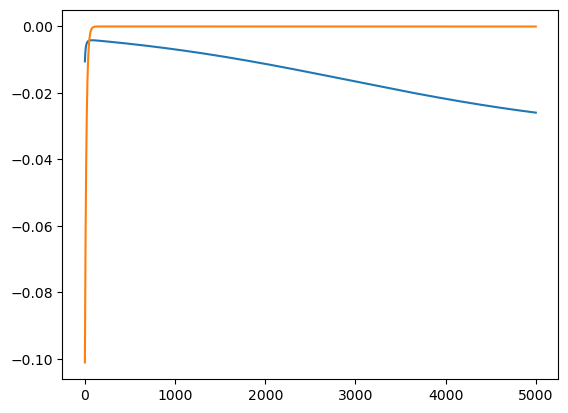

In [460]:
plt.plot(np.matmul(np.linalg.inv(v),n_perturbed)[0,:])
plt.plot(np.matmul(np.linalg.inv(v),n_perturbed)[4,:] + np.matmul(np.linalg.inv(v),n_perturbed)[5,:] )

In [462]:

v[:,1]

array([ 0.03759878-0.19015387j, -0.01237621+0.04647025j,
       -0.03727905+0.05567192j, -0.11359576+0.00080609j,
        0.15378569+0.28676017j, -0.15315151+0.03247278j,
        0.02873987-0.03781549j,  0.02388453-0.01635734j,
       -0.03959788+0.06555525j,  0.03204655-0.01467793j,
       -0.37056336+0.05890084j, -0.12932575-0.001025j  ,
       -0.03581058+0.01564449j, -0.21780696-0.00745282j,
        0.02834055+0.02479549j, -0.12528599+0.14192017j,
        0.28465584-0.10197933j,  0.18589357-0.01491345j,
        0.19469545-0.00507189j,  0.05292028+0.06363196j,
        0.16027408-0.1707429j , -0.09664619+0.01481721j,
        0.40959459+0.j        , -0.01229443+0.0468313j ,
       -0.00179479+0.00262779j, -0.03806406-0.18299972j,
        0.03007029-0.00405483j,  0.09505004+0.2464234j ,
       -0.09613829-0.15109958j, -0.05514707-0.10996557j])